# KNeighbors

In [27]:
from joblib import dump

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import shap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, balanced_accuracy_score,  f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:
df = pd.read_csv("../../../data/combined_subjects.csv")

In [30]:
df.head()

,Unnamed: 0,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,...,ACC_z_min,ACC_z_max,0_mean,0_std,0_min,0_max,BVP_peak_freq,TEMP_slope,subject,label
0,0,1.331891,0.153556,1.014138,1.678399,2.247876,1.112076,0.367977,4.459367,1.592308,...,-0.000026,0.000060,0.027558,0.013523,0.000000,0.087383,0.080556,-0.000102,2,1
1,1,1.218994,0.090108,1.014138,1.485800,1.781323,1.203991,0.232625,4.459367,1.347750,...,-0.000026,0.000060,0.023420,0.015310,0.000000,0.087383,0.144444,-0.000424,2,1
2,2,1.143312,0.110987,0.948835,1.485800,1.173169,1.285422,0.006950,4.459367,0.752335,...,-0.000015,0.000049,0.018759,0.012604,0.000000,0.071558,0.102778,-0.000814,2,1
3,3,1.020669,0.135308,0.811090,1.239944,0.311656,0.278650,0.006950,1.303071,0.198576,...,-0.000005,0.000037,0.022888,0.012180,0.000688,0.054356,0.108333,-0.000524,2,1
4,4,0.887458,0.116048,0.727406,1.125306,0.163826,0.110277,0.006950,0.369298,0.118080,...,0.000002,0.000037,0.028105,0.010415,0.002752,0.054356,0.147222,-0.000165,2,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2091 non-null   int64  
 1   net_acc_mean     2091 non-null   float64
 2   net_acc_std      2091 non-null   float64
 3   net_acc_min      2091 non-null   float64
 4   net_acc_max      2091 non-null   float64
 5   EDA_phasic_mean  2091 non-null   float64
 6   EDA_phasic_std   2091 non-null   float64
 7   EDA_phasic_min   2091 non-null   float64
 8   EDA_phasic_max   2091 non-null   float64
 9   EDA_smna_mean    2091 non-null   float64
 10  EDA_smna_std     2091 non-null   float64
 11  EDA_smna_min     2091 non-null   float64
 12  EDA_smna_max     2091 non-null   float64
 13  EDA_tonic_mean   2091 non-null   float64
 14  EDA_tonic_std    2091 non-null   float64
 15  EDA_tonic_min    2091 non-null   float64
 16  EDA_tonic_max    2091 non-null   float64
 17  BVP_mean      

## Data Preparation

In [32]:
features = ["EDA_smna_mean", "EDA_phasic_min", "EDA_tonic_mean", "EDA_tonic_min", "EDA_tonic_max", "label"]

In [33]:
df_feat = df[features]
df_feat.head()

,EDA_smna_mean,EDA_phasic_min,EDA_tonic_mean,EDA_tonic_min,EDA_tonic_max,label
0,1.592308,0.367977,0.608263,-1.213173,2.554750,1
1,1.347750,0.232625,0.731985,-1.213173,2.477276,1
2,0.752335,0.006950,1.110242,-1.213173,2.037179,1
3,0.198576,0.006950,1.598995,0.959752,2.037179,1
4,0.118080,0.006950,1.342085,0.945946,2.037179,1


In [34]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDA_smna_mean   2091 non-null   float64
 1   EDA_phasic_min  2091 non-null   float64
 2   EDA_tonic_mean  2091 non-null   float64
 3   EDA_tonic_min   2091 non-null   float64
 4   EDA_tonic_max   2091 non-null   float64
 5   label           2091 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 98.1 KB


### Merged Amusement

In [35]:
df_feat_merged_amusement = df_feat.copy()
df_feat_merged_amusement["label"] = df_feat_merged_amusement["label"].replace([0], 1)

In [36]:
df_feat_merged_amusement["label"].unique()

array([1, 2])

In [37]:
y_merged_amusement = np.array(df_feat_merged_amusement.pop('label'))
X_merged_amusement = np.array(df_feat_merged_amusement)

In [38]:
X_train_merged_amusement, X_test_merged_amusement, y_train_merged_amusement, y_test_merged_amusement = train_test_split(X_merged_amusement, y_merged_amusement, test_size=0.25, random_state=42)

### Dropped amusement

In [39]:
df_feat_no_amusement = df_feat[df_feat["label"] != 0]

In [40]:
df_feat_no_amusement["label"].unique()

array([1, 2])

In [41]:
y_no_amusement = np.array(df_feat_no_amusement.pop('label'))
X_no_amusement = np.array(df_feat_no_amusement)

In [42]:
X_train_no_amusement, X_test_no_amusement, y_train_no_amusement, y_test_no_amusement = train_test_split(X_no_amusement, y_no_amusement, test_size=0.25, random_state=42)

## Training

In [43]:
parameters = dict(
    n_neighbors=(2,),
    weights=("uniform", "distance"),
    algorithm=("ball_tree", "kd_tree", "brute")
)

In [44]:
neighbor = KNeighborsClassifier()

### Merged Amusement

In [45]:
clf_neighbor_merged_amusement = GridSearchCV(estimator=neighbor, param_grid=parameters)

In [46]:
clf_neighbor_merged_amusement.fit(X_train_merged_amusement, y_train_merged_amusement)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (2,),
                         'weights': ('uniform', 'distance')})

In [47]:
clf_neighbor_merged_amusement.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, weights='distance')

In [48]:
dump(clf_neighbor_merged_amusement.best_estimator_, "clf_neighbor_merged_amusement_eda_feat.joblib")

['clf_neighbor_merged_amusement_eda_feat.joblib']

### Dropped Amusement

In [49]:
clf_neighbor_no_amusement = GridSearchCV(estimator=neighbor, param_grid=parameters)

In [50]:
clf_neighbor_no_amusement.fit(X_train_no_amusement, y_train_no_amusement)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (2,),
                         'weights': ('uniform', 'distance')})

In [51]:
clf_neighbor_no_amusement.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, weights='distance')

In [52]:
dump(clf_neighbor_no_amusement.best_estimator_, "clf_neighbor_no_amusement_eda_feat.joblib")

['clf_neighbor_no_amusement_eda_feat.joblib']

## Evaluation

### Merged Amusement

In [53]:
y_pred_merged_amusement = clf_neighbor_merged_amusement.predict(X_test_merged_amusement)

In [54]:
accuracy_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9273422562141491

In [55]:
balanced_accuracy_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9034373750953817

In [56]:
f1_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9500000000000001

In [57]:
precision_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9425587467362925

In [58]:
recall_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9575596816976127

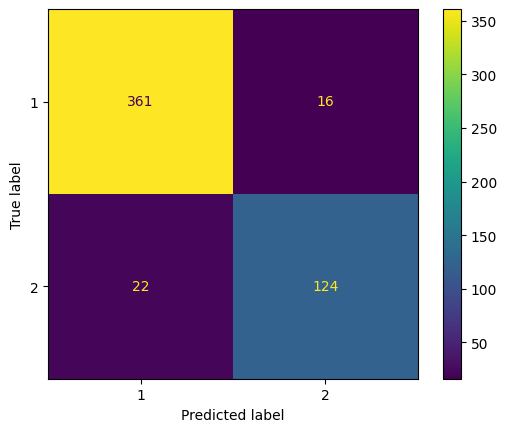

In [59]:
cm = confusion_matrix(y_test_merged_amusement, y_pred_merged_amusement, labels=clf_neighbor_merged_amusement.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_neighbor_merged_amusement.best_estimator_.classes_)
disp.plot()
plt.show()

### Dropped Amusement

In [60]:
y_pred_no_amusement = clf_neighbor_no_amusement.predict(X_test_no_amusement)

In [61]:
accuracy_score(y_test_no_amusement, y_pred_no_amusement)

0.9113636363636364

In [62]:
balanced_accuracy_score(y_test_no_amusement, y_pred_no_amusement)

0.898083398083398

In [63]:
f1_score(y_test_no_amusement, y_pred_no_amusement)

0.934453781512605

In [64]:
precision_score(y_test_no_amusement, y_pred_no_amusement)

0.9328859060402684

In [65]:
recall_score(y_test_no_amusement, y_pred_no_amusement)

0.936026936026936

In [66]:
confusion_matrix(y_test_no_amusement, y_pred_no_amusement, labels=[1, 2])

array([[278,  19],
       [ 20, 123]])

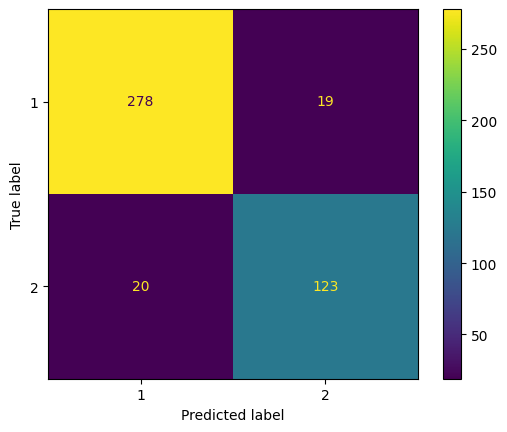

In [67]:
cm = confusion_matrix(y_test_no_amusement, y_pred_no_amusement, labels=clf_neighbor_no_amusement.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_neighbor_no_amusement.best_estimator_.classes_)
disp.plot()
plt.show()

## XAI

### Merged Amusement

In [68]:
# explainer = shap.KernelExplainer(
#     clf_neighbor_merged_amusement.best_estimator_.predict,
#     X_test_merged_amusement
# )

# shap_values = explainer.shap_values(X_test_merged_amusement)

In [69]:
# shap.summary_plot(shap_values=shap_values, features=X_test_merged_amusement, feature_names=features)

### Dropped Amusement

In [70]:
# explainer = shap.KernelExplainer(
#     clf_neighbor_no_amusement.best_estimator_.predict,
#     X_test_no_amusement
# )

# shap_values = explainer.shap_values(X_test_no_amusement)

In [71]:
# shap.summary_plot(shap_values=shap_values, features=X_test_no_amusement, feature_names=features)